<a href="https://colab.research.google.com/github/iniaryafaturahman/Data-Mining/blob/main/UTS_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Muhammad Arya Faturahman

Nim: 231011401773

Kelas: 04TPLP026

Upload Data


In [5]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("data_pelanggan.xlsx")
df.head()

Saving data_pelanggan.xlsx to data_pelanggan (1).xlsx


,umur,pendapatan,pembelian_tahunan,loyalitas
0,58,77,6,Tidak Loyal
1,48,52,8,Tidak Loyal
2,34,91,5,Tidak Loyal
3,27,117,4,Tidak Loyal
4,40,66,2,Tidak Loyal


Explorasi Data

In [6]:
df.info()
print("\nMissing values\n", df.isnull().sum())
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   umur               100 non-null    int64 
 1   pendapatan         100 non-null    int64 
 2   pembelian_tahunan  100 non-null    int64 
 3   loyalitas          100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB

Missing values
 umur                 0
pendapatan           0
pembelian_tahunan    0
loyalitas            0
dtype: int64


Index(['umur', 'pendapatan', 'pembelian_tahunan', 'loyalitas'], dtype='object')

Visualisasi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   umur               100 non-null    int64 
 1   pendapatan         100 non-null    int64 
 2   pembelian_tahunan  100 non-null    int64 
 3   loyalitas          100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None
             umur  pendapatan  pembelian_tahunan
count  100.000000  100.000000         100.000000
mean    38.790000   74.090000           6.660000
std     11.556008   26.947797           3.929222
min     20.000000   30.000000           1.000000
25%     28.000000   55.250000           3.000000
50%     39.500000   75.000000           6.000000
75%     47.250000   92.500000           9.000000
max     59.000000  119.000000          14.000000
umur                 0
pendapatan           0
pembelian_tahunan    0
loyalitas            0
dtype: int64


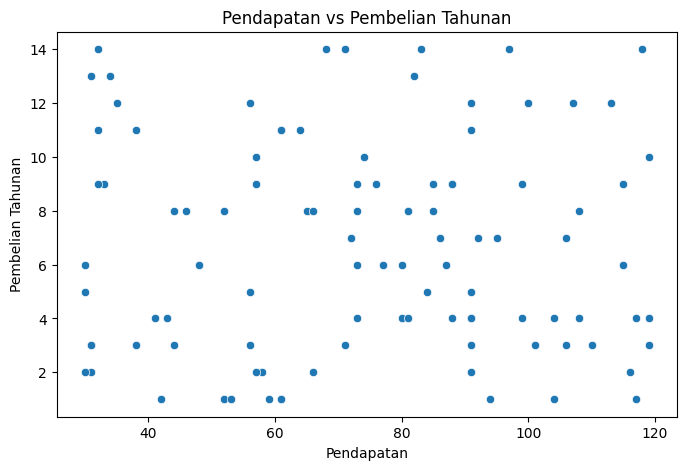

In [12]:
print(df.info())
print(df.describe())


print(df.isnull().sum())

plt.figure(figsize=(8,5))
sns.scatterplot(x='pendapatan', y='pembelian_tahunan', data=df)
plt.title('Pendapatan vs Pembelian Tahunan')
plt.xlabel('Pendapatan')
plt.ylabel('Pembelian Tahunan')
plt.show()


Persiapan data untuk klasifikasi

In [14]:

threshold = df['pembelian_tahunan'].median()
df['label'] = (df['pembelian_tahunan'] > threshold).astype(int)


X = df[['pendapatan']]
y = df['label']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Implementasi Algoritma

In [15]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


Klasifikasi

In [16]:
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_knn = accuracy_score(y_test, y_pred_knn)

print("Akurasi Decision Tree:", acc_dt)
print("Akurasi KNN:", acc_knn)

print("\nDecision Tree Report:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("\nKNN Report:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Akurasi Decision Tree: 0.45
Akurasi KNN: 0.35

Decision Tree Report:
[[6 6]
 [5 3]]
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.33      0.38      0.35         8

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.46      0.45      0.45        20


KNN Report:
[[4 8]
 [5 3]]
              precision    recall  f1-score   support

           0       0.44      0.33      0.38        12
           1       0.27      0.38      0.32         8

    accuracy                           0.35        20
   macro avg       0.36      0.35      0.35        20
weighted avg       0.38      0.35      0.35        20



Kesimpulan

Perbedaan performa antara Decision Tree dan K-Nearest Neighbors (KNN) dipengaruhi oleh sifat data, jumlah fitur, dan hubungan antar fitur. Decision Tree lebih efektif untuk data dengan hubungan logis atau aturan yang jelas antara fitur, dan lebih mudah dipahami karena menghasilkan model berbentuk pohon keputusan. Sebaliknya, KNN cocok untuk data yang lebih kompleks atau non-linear, namun membutuhkan lebih banyak perhitungan karena bergantung pada kedekatan antar titik data, sehingga lebih lambat terutama pada dataset besar.

Kecepatan pelatihan dan inferensi juga menjadi faktor penting. Decision Tree cenderung lebih cepat dalam pelatihan dan inferensi, karena hanya membutuhkan traversal pohon. Namun, KNN sangat bergantung pada jumlah data dan membutuhkan waktu lebih lama untuk prediksi karena harus menghitung jarak antar titik data setiap kali melakukan klasifikasi. KNN juga sangat sensitif terhadap outliers dan memerlukan normalisasi data, sementara Decision Tree dapat menangani data dengan skala berbeda tanpa normalisasi.

Kelebihan lainnya, Decision Tree lebih rentan terhadap overfitting, terutama pada dataset yang mengandung banyak noise atau fitur yang tidak relevan, sedangkan KNN bisa lebih stabil tetapi lebih sensitif terhadap pemilihan parameter k dan keberadaan outliers. Keputusan antara menggunakan Decision Tree atau KNN sangat bergantung pada karakteristik dataset, ukuran data, dan kebutuhan interpretabilitas model.